**CÉLULA 1 — Instalação de Bibliotecas**

In [1]:
!pip install matplotlib pandas

**CÉLULA 2 — Upload do Arquivo**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_weather.csv to dataset_weather.csv


**CÉLULA 3 — Código Para "ler_csv.py"**

In [3]:
import pandas as pd

def ler_csv(caminho):
    df = pd.read_csv(caminho, sep=";", encoding="utf-8")

    print("CSV carregado com sucesso!\n")
    print(df.head())

    numeric_cols = ["Tmax", "Tmin", "Rain", "Sun"]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

    print("\nTipos de dados:")
    print(df.dtypes)

    return df

**CÉLULA 4 — Código das Análises**

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Últimos 10 anos
def obter_ultimo_ano(df):
    return df["Year"].max()

def filtrar_ultimos_10(df):
    ultimo = obter_ultimo_ano(df)
    return df[df["Year"].between(ultimo-9, ultimo)]

def analisar_ultimos10(df):
    dados = filtrar_ultimos_10(df)

    print("=== ANÁLISE DOS ÚLTIMOS 10 ANOS ===")
    print(dados.groupby("Year")["Tmax"].mean())

    linha_max = dados.loc[dados["Tmax"].idxmax()]
    print("\nPico máximo encontrado:")
    print(linha_max)

# Gráfico dos últimos 10 anos
def plotar_ultimos10(df):
    dados = filtrar_ultimos_10(df)
    anos = sorted(dados["Year"].unique())

    for ano in anos:
        temp = dados[dados["Year"] == ano]
        plt.plot(temp["Month"], temp["Tmax"], marker="o", label=str(ano))

    plt.title("Tmax - Últimos 10 anos")
    plt.xlabel("Mês")
    plt.ylabel("Tmax (°C)")
    plt.legend()
    plt.show()

# Primeiros 10 anos
def obter_primeiro_ano(df):
    return df["Year"].min()

def filtrar_primeiros_10(df):
    primeiro = obter_primeiro_ano(df)
    return df[df["Year"].between(primeiro, primeiro+9)]

def plotar_primeiros10(df):
    dados = filtrar_primeiros_10(df)
    anos = sorted(dados["Year"].unique())

    for ano in anos:
        temp = dados[dados["Year"] == ano]
        plt.plot(temp["Month"], temp["Tmax"], marker="o", label=str(ano))

    plt.title("Tmax - Primeiros 10 anos")
    plt.xlabel("Mês")
    plt.ylabel("Tmax (°C)")
    plt.legend()
    plt.show()

**CÉLULA 5 — Gráfico de Bolhas**

In [6]:
def grafico_bolhas(df):
    plt.scatter(df["Month"], df["Tmax"], s=df["Tmax"]*8)
    plt.title("Gráfico de Bolhas - Tmax por mês (todos os anos)")
    plt.xlabel("Mês")
    plt.ylabel("Tmax (°C)")
    plt.show()

**CÉLULA 6 — Main**

Digite o nome do arquivo enviado (ex: dataset_weather.csv): dataset_weather.csv
CSV carregado com sucesso!

   Year  Month  Tmax  Tmin  Rain    Sun
0  1957      1   8.7   2.7  39.5   53.0
1  1957      2   9.0   2.9  69.8   64.9
2  1957      3  13.9   5.7  25.4   96.7
3  1957      4  14.2   5.2   5.7  169.6
4  1957      5  16.2   6.5  21.3  195.0

Tipos de dados:
Year       int64
Month      int64
Tmax     float64
Tmin     float64
Rain     float64
Sun      float64
dtype: object

=== MENU ===
1 - Gráfico de Bolhas
2 - Análise Últimos 10 anos
3 - Gráfico Últimos 10 anos
4 - Gráfico Primeiros 10 anos
Escolha uma opção: 3


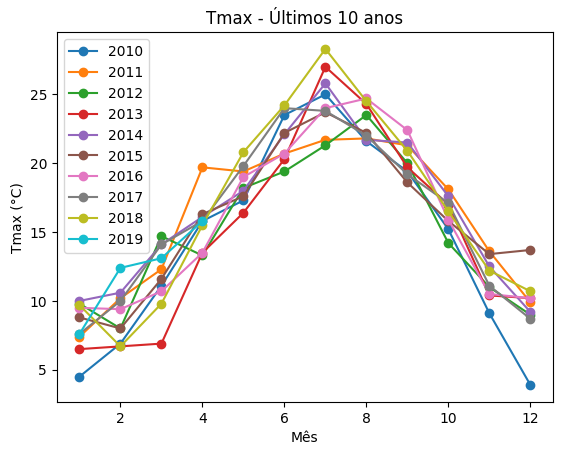

In [7]:
caminho = input("Digite o nome do arquivo enviado (ex: dataset_weather.csv): ")
df = ler_csv(caminho)

print("\n=== MENU ===")
print("1 - Gráfico de Bolhas")
print("2 - Análise Últimos 10 anos")
print("3 - Gráfico Últimos 10 anos")
print("4 - Gráfico Primeiros 10 anos")

opcao = input("Escolha uma opção: ")

if opcao == "1":
    grafico_bolhas(df)

elif opcao == "2":
    analisar_ultimos10(df)

elif opcao == "3":
    plotar_ultimos10(df)

elif opcao == "4":
    plotar_primeiros10(df)

else:
    print("Opção inválida!")